# Digital Signal Image Processing Assignment - Fourier Series

**Riccardo Caprile 4370774**

Description of the assignment : Hand in a Python notebook which computes the Fourier expansion of a real valued
function f where

 a is sampled uniformly in the interval [-2;-1]

b is sampled uniformly in the interval [1; 2]


and the function f : [a; b] -> R is defined as

f(t) = $ pe^{qt} sin(ln(1 + rt^2))$ if $t \in [a,0)$ , $ s$ if $ t \in [0,b] 

With p,q,r and s are sampled uniformly in the interval [0,1]

Comment the results you obtain, Gibbs phenomenon included, when using the first 20, 40, and 60
harmonics.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

# Uniform Sampling

In [14]:
#Varibles random sampling
a = np.random.uniform(-2, np.nextafter(-1, 0))
b = np.random.uniform(1, np.nextafter(2, 3))

p = np.random.uniform(0, np.nextafter(1, 2))
q = np.random.uniform(0, np.nextafter(1, 2))
r = np.random.uniform(0, np.nextafter(1, 2))
s = np.random.uniform(0, np.nextafter(1, 2))

In [15]:
delta = 0.0001
t = np.arange(a, np.nextafter(b, 3), delta)

# Definition of the signal f(t)

In [16]:
def f(t):
    if t >= a and t <=0:
        return p * np.exp(q * t) * np.sin(np.log(1 + r * (t ** 2)))
    elif t>= 0 and t <= b:
        return s

# Let's plot the signal

Text(0.5, 1.0, 'Signal f(t)')

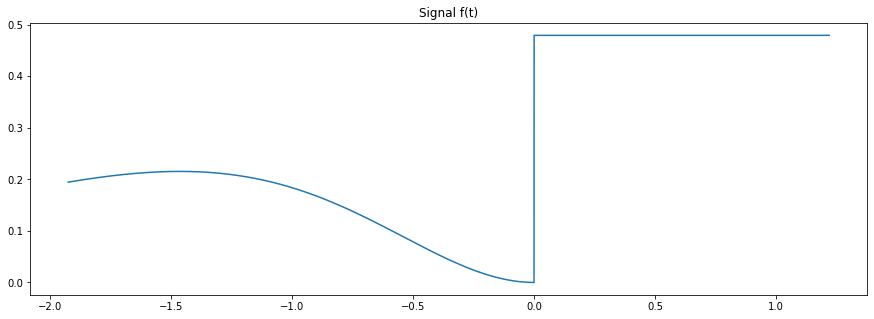

In [5]:
#f(t) with t set of time samples between the interval a and b

y = np.zeros(len(t))

for i in range(len(t)):
    y[i] = f(t[i])
    
plt.plot(t,y)
plt.title("Signal f(t)")

# Fourier Series 

We will now compute the Fourier Series coefficients and reconstruct the signal with its Fourier Series


In [6]:
def fseries(x, signal,K):
    
    """
    Returns an approximation of a given signal with a Fourier series approximation
    of K coefficients.
    
    Parameters:
    ----------
    x: independent variable (time)
    signal: function of x to be approximated
    K: number of harmonics to be used
    
    Returns:
    --------
    series: Fourier series of the signal
    a_0: coefficient with k=0 
    a: array of coefficients for odd components (cosine)
    b: array of coefficients for even components (sine)
    
    
    """
    
    ## reconstructed signal
    xr = np.zeros((len(x)))
    
    ## scaling factor
    c = (x[-1]-x[0])/len(x)
    
    a_0 = np.dot(signal, np.ones(len(x))) ## average of the signal over the range
    a_0 = c*a_0/np.pi
    
    
    ## Fourier coefficients arrays
    a = np.zeros(K)
    b = np.zeros(K)
    
    for k in range(1,K+1):
        ## evaluates coefficients
        a_k = c*np.dot(signal,np.cos(k*x))*1/np.pi
        a[k-1]=a_k
        b_k = c*np.dot(signal,np.sin(k*x))*1/np.pi
        b[k-1]=b_k
        
        ## computes series
        xr = xr + a_k*np.cos(k*x) + b_k*np.sin(k*x)
        series = 1/2*a_0+xr
    
    return series, a_0, a, b

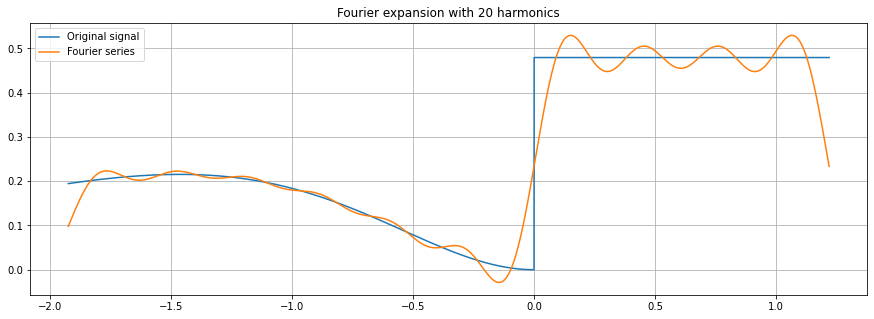

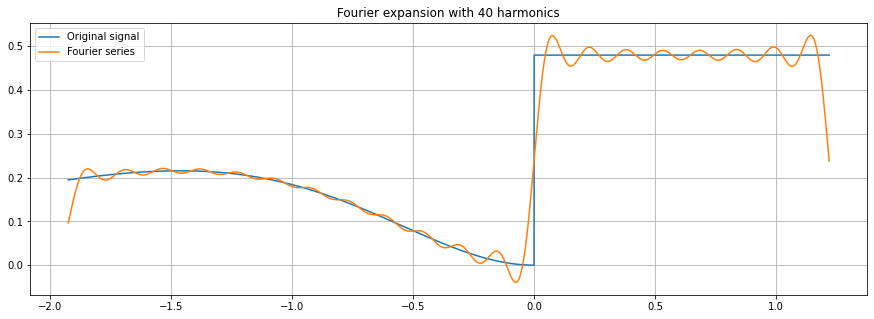

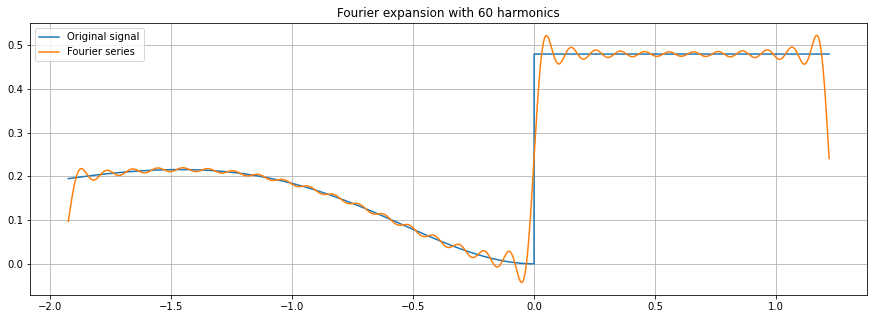

In [11]:
for i in range (20, 61, 20): 
  
  series, a_0, _, _ = fseries(t, y, i)
  plt.plot(t, y, label='Original signal')
  plt.grid()
  plt.plot(t, series, label='Fourier series')
  plt.title("Fourier expansion with %d harmonics"%i)
  plt.legend()
  plt.show()

**Comment**

With a greater number of harmonics the reconstruction of the signal is more accurate.

The ripples next to the discontinuites are caused bay the Gibbs Phenomenon.

This happens because the the Fourier Series converges also at point t* of discontinuity, but it converges to the average of the limit of f(t) for t -> t*+ and t -> t*_. At points nearby t* oscillates wildly.